## `Columns Details:` 
- **age**: age of primary beneficiary
- **sex**: gender: male/female
- **bmi**: Body mass index
- **children**: Number of children covered by health insurance / Number of dependents
- **smoker**: Smoking
- **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- **charges**: Individual medical costs decided by health insurance

## `Steps to follow:`
- 1- **Identifying the problem**
- 2- **Data preparing/preprocessing (if needed)**
- 3- **EDA for more data understanding**

------ inside other notebooks (task1_from scrtach,task1_by library)----------

- 4- **Modeling**
- 5- **Evaluating model**


## `First: identifying problem`
- The main problem we aim to address is to accurately predict insurance costs for individuals 
based on a set of features that describe their personal characteristics and lifestyle choices. 


In [625]:
# importing needed libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [626]:
data = pd.read_csv("C:/Users/DELL/Desktop/Task1/insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## `Second: Data preparing/preprocessing (if needed) `

In [627]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [628]:
data.shape

(1338, 7)

In [629]:
# checking any missing values
data.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [630]:
# since no missing values needed, let's check the duplication

In [631]:
#check any duplication my be found
data.duplicated().sum()

1

In [632]:
# drop duplication
data.drop_duplicates(inplace=True) 

In [633]:
# Statsical information for numerical features
round(data.describe(include="number"))

,age,bmi,children,charges
count,1337.0,1337.0,1337.0,1337.0
mean,39.0,31.0,1.0,13279.0
std,14.0,6.0,1.0,12110.0
min,18.0,16.0,0.0,1122.0
25%,27.0,26.0,0.0,4746.0
50%,39.0,30.0,1.0,9386.0
75%,51.0,35.0,2.0,16658.0
max,64.0,53.0,5.0,63770.0


In [634]:
# Statsical information for categoral (non-numeric) features
round(data.describe(exclude="number"))

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


## `Third: EDA`

In [635]:
## Univariante analysis

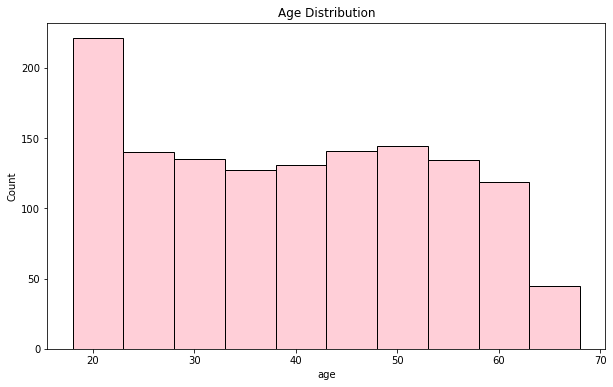

In [636]:
plt.figure(figsize=(10, 6))
sns.histplot(data, x="age",binwidth=5, color="pink")
plt.title("Age Distribution")
plt.show()

### observation
- Most of people ages ranges from 18-23

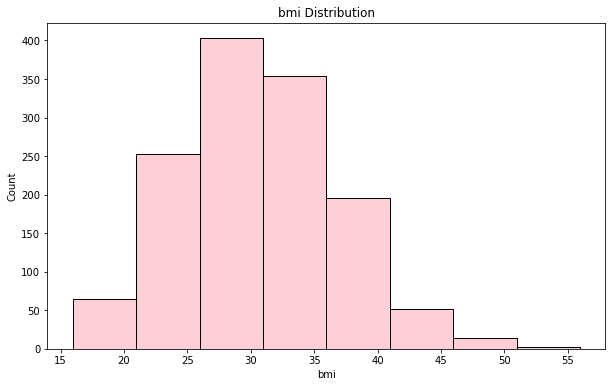

In [637]:
plt.figure(figsize=(10, 6))
sns.histplot(data, x="bmi",binwidth=5, color="pink")
plt.title("bmi Distribution")
plt.show()

### observation
- Most of people bmi ranges from 26.0-31.0 as their mean is 31.0
- The above observation declares that most of these people are overweight

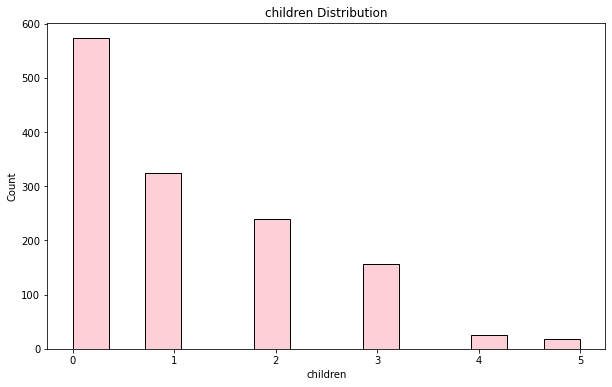

In [638]:
plt.figure(figsize=(10, 6))
sns.histplot(data, x="children", color="pink")
plt.title("children Distribution")
plt.show()


In [639]:
data["children"].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

### observation
- Most of people don't have children

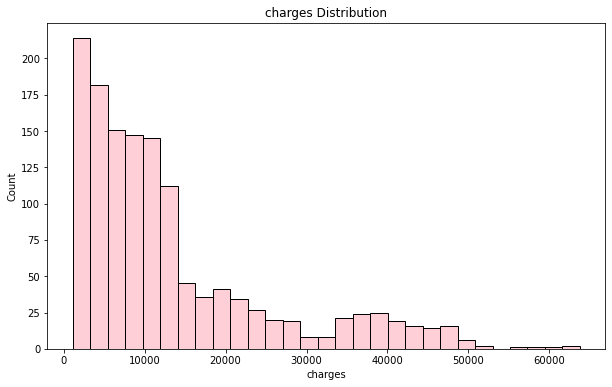

In [640]:
plt.figure(figsize=(10, 6))
sns.histplot(data, x="charges", color="pink")
plt.title("charges Distribution")
plt.show()


### observation
- The distribution is right-skewed
- most of people charges range from 1100 to 10000

In [641]:
sex_count = data["sex"].value_counts()
sex_count

male      675
female    662
Name: sex, dtype: int64

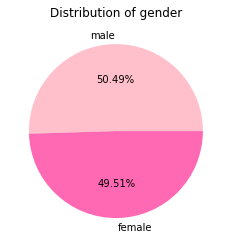

In [642]:
#colors = ['pink', 'lightpink']
colors = ['#FFC0CB', '#FF69B4']
plt.pie(labels=sex_count.index,x=sex_count.values, colors=colors,autopct = '%.2f%%')
plt.title("Distribution of gender")
plt.show()


### observation
- The distribution is slightly equal but men are more

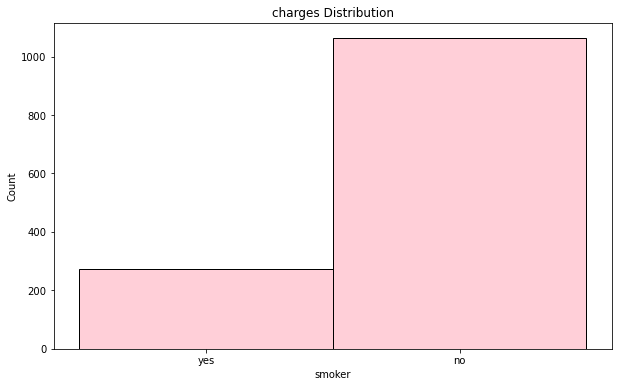

In [643]:
plt.figure(figsize=(10, 6))
sns.histplot(data, x="smoker", color="pink")
plt.title("charges Distribution")
plt.show()

### observation
- Most of them don't smoke

In [644]:
region_count = data["region"].value_counts()
region_count

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

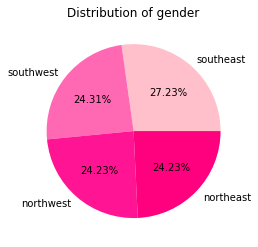

In [645]:
#colors = ['pink', 'lightpink']
colors = ['#FFC0CB', '#FF69B4', '#FF1493', '#FF007F'] 
plt.pie(labels=region_count.index,x=region_count.values, colors=colors,autopct = '%.2f%%')
plt.title("Distribution of gender")
plt.show()

### observation
- The distribution of regions is nearly equal

In [646]:
## Bivariante analysis

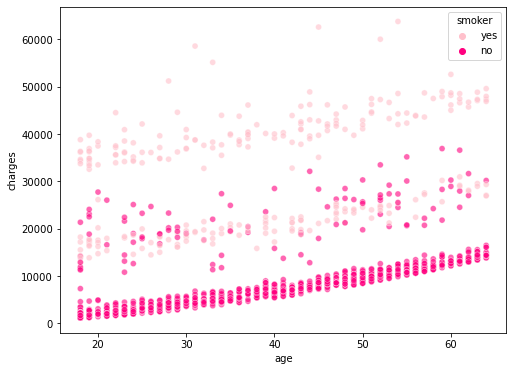

In [647]:
plt.figure(figsize=(8,6))
sns.scatterplot(data.age, data.charges,hue=data.smoker,palette= ['#FFC0CB', '#FF007F'] ,alpha=0.6)
plt.show()

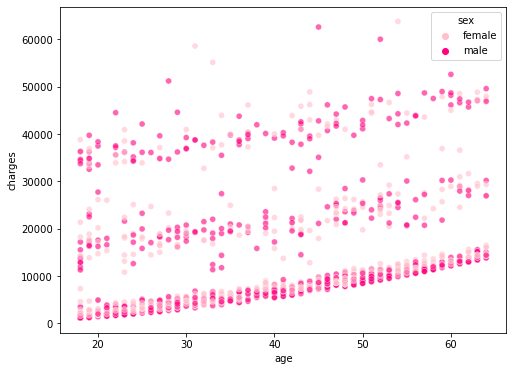

In [648]:
plt.figure(figsize=(8,6))
sns.scatterplot(data.age, data.charges,hue=data.sex,palette= ['#FFC0CB', '#FF007F'] ,alpha=0.6)
plt.show()